# Exploring the titanic Dataset
* Introduction
* Load and check the dataset
* Feature Engineering
* Finding which is the best model
* Model creation
* checking accuracy
* Hyper parameter Tunning
* Submission






#  Introduction
     This is my first kaggle notebook,In this notebook we going to predict the survival of the people in the titanic disaster.


# Load and check the Dataset
Importing necessary Libraries for our model


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


In [2]:
dataset=pd.read_csv("../input/titanic/train.csv")
dataset.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploritary Data Analysis

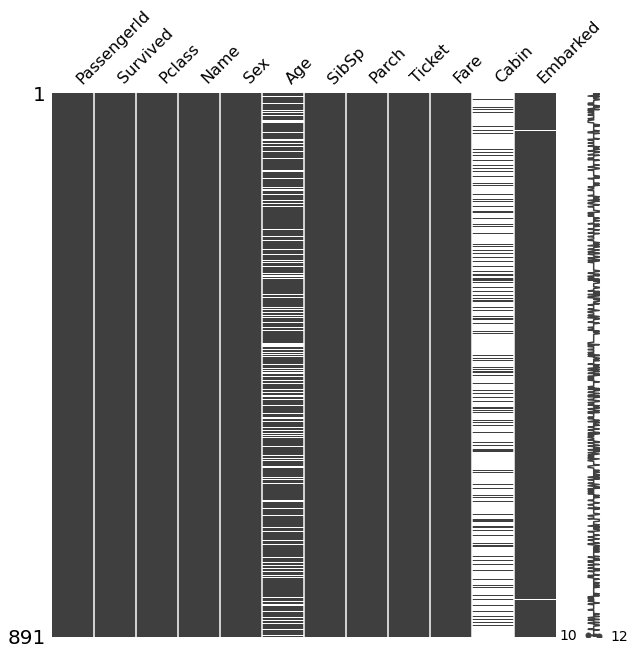

In [3]:
missing_data=missingno.matrix(dataset,figsize = (10,10))
missing_data

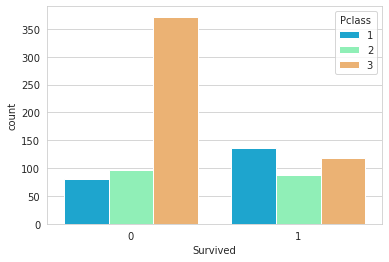

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=dataset,palette='rainbow')

* In the above graph ) represent passanger not survived,One represent passanger survived.The passanger who where in the first class has a high survival rate.

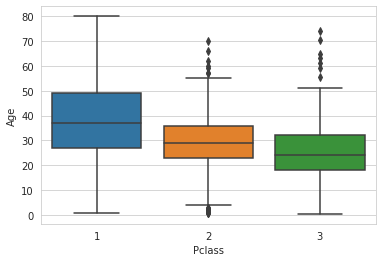

In [5]:
sns.boxplot(x='Pclass',y='Age',data=dataset)

# Feature Engineering

* Filling values in the missing area

In [6]:
dataset['Sex'] = np.where(dataset['Sex'] == 'female', 1, 0)


* We have to fill the missing age data with the help of box plot in EDA

In [7]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
dataset['Age'] =dataset[['Age','Pclass']].apply(impute_age,axis=1)

In [8]:
dataset.Age.isnull().sum()

0

In [9]:

df_sex_one_hot = pd.get_dummies(dataset['Embarked'], 
                                prefix='Embarked')


# Combine the one hot encoded columns with df_con_enc
dataset= pd.concat([dataset,df_sex_one_hot],axis=1)
                       

# Drop the original categorical columns (because now they've been one hot encoded)
dataset=dataset.drop(['Embarked'], axis=1)

In [10]:
dataset.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

* In Cabin there are Lots of missing  so we remove the cabin column,Then we dont need Ticket and Name  this are not very important for our model.

In [11]:
dataset=dataset.drop(['Cabin','Ticket','Name'],axis=1)

In [12]:
dataset.isnull().sum()
dataset.shape

(891, 11)

In [13]:
cs=dataset
cs.to_csv('../formulated_train.csv', index=False)
print('modified train CSV is ready!')


modified train CSV is ready!


* We finish the handling  the train dataset now we have to do the same thing to the test data

In [14]:
test_dataset=pd.read_csv("../input/titanic/test.csv")
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


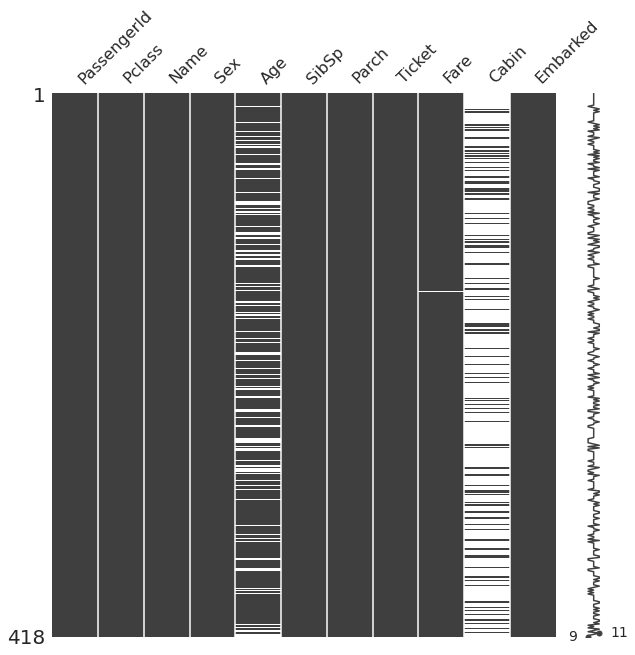

In [15]:
missing_data=missingno.matrix(test_dataset,figsize = (10,10))
missing_data

In [16]:
test_dataset['Sex'] = np.where(test_dataset['Sex'] == 'female', 1, 0)


def impute_age1(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
test_dataset['Age'] =test_dataset[['Age','Pclass']].apply(impute_age1,axis=1)


In [17]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test_dataset['Embarked'], 
                                       prefix='Embarked')

In [18]:
# Combine the test one hot encoded columns with test
test_dataset = pd.concat([test_dataset, 
                  test_embarked_one_hot], axis=1)

In [19]:
test_dataset=test_dataset.drop(['Embarked','Name','Cabin','Ticket'], axis=1)
test_dataset['Fare'].fillna(np.mean(test_dataset['Fare']), inplace=True)


In [20]:
print(test_dataset.isnull().sum())

test_dataset.shape

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


(418, 10)

In [21]:
#train_df=pd.concat([df['SalePrice'],train_df],axis=1)
csv=test_dataset
csv.to_csv('../formulated_test.csv', index=False)
print('modified test CSV is ready!')

modified test CSV is ready!


* Finally our Feature engineering part was over next step we have to develope our model

# Finding which is the best model

* Idid some cross validation then I choose Decission tree

# Model creation


In [22]:
df=cs #cs is a formulated train dataset
x=df.drop(['Survived'],axis=1)

y=df['Survived']

In [23]:
from sklearn.model_selection import train_test_split 
from sklearn import tree

# Decision Tree Classifier

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

                                           
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
 

predictions = model.predict(x_test)
predictions

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

# checking accuracy

In [24]:

from sklearn.metrics import confusion_matrix

accuracy=confusion_matrix(y_test,predictions)

print("confusion_matrix:",accuracy)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,predictions)
print("accuracy_score:",accuracy)


confusion_matrix: [[96 14]
 [24 45]]
accuracy_score: 0.7877094972067039


* we have to reduce the type 1and type 2 error for that we need hypertunning our model

In [25]:

from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est=tree.DecisionTreeClassifier()
rf_p_dist={'max_depth':[3,5,10,None],
           
           'max_features':randint(1,10),
           'criterion':['entropy','gini'],
          
           'min_samples_leaf':randint(1,4),
           
        
    
        }
def hypertunning_rscv(est,p_distr,nbr_iter,x,y):
    rdmsearch=RandomizedSearchCV(est,param_distributions=p_distr,
                                 n_jobs=-1,n_iter=nbr_iter,cv=9)
    rdmsearch.fit(x,y)
    ht_params=rdmsearch.best_params_
    ht_score=rdmsearch.best_score_
    return ht_params,ht_score


rf_parameters,rf_ht_score=hypertunning_rscv(est,rf_p_dist,40,x,y)

rf_parameters

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 6,
 'min_samples_leaf': 1}

In [26]:
# after hyper parameter tunning

from sklearn.model_selection import train_test_split 
from sklearn import tree

# Decision Tree Classifier

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

                                           
model = tree.DecisionTreeClassifier(criterion= 'gini',
                                             max_depth= 3,
                                             max_features= 9,
                                             min_samples_leaf= 1,
                                             splitter='best')
model.fit(x_train,y_train)
 # Cross Validation 

predictions = model.predict(x_test)
#print("preddicted value",pcriterion='gini'redictions)
#print(len(predictions))

from sklearn.metrics import confusion_matrix

accuracy=confusion_matrix(y_test,predictions)

print("confusion_matrix:",accuracy)

from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,predictions)
accuracy

confusion_matrix: [[96 14]
 [20 49]]


0.8100558659217877

* after the hyperparameter tunning false negative little bit reduced and the accuracy was increased

In [27]:
test_df=csv


prediction = model.predict(test_df)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test_df['PassengerId']
submission['Survived'] = prediction # our model predictions on the test dataset
submission.head()


# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')


Converted Survived column to integers.


In [29]:



# Are our test and submission dataframes the same length?
if len(submission) == len(test_df):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../submission1.csv', index=False)
print('Submission CSV is ready!')

Submission dataframe is the same length as test (418 rows).
Submission CSV is ready!
